<a href="https://colab.research.google.com/github/kacpercierpiak/AED_LAB/blob/main/AED_L_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORYTMY I EKSPLORACJA DANYCH**
# *LAB3 - Uczenie bez nadzoru*

In [147]:
import sys
!{sys.executable} -m pip install scikit-learn-extra

import shutil

shutil.rmtree('./AED_LAB_DATA', ignore_errors=True)
!git clone https://github.com/kacpercierpiak/AED_LAB_DATA.git

rootPath = './AED_LAB_DATA/LAB3/'

     |████████████████████████████████| 1.7 MB 10.0 MB/s 
Cloning into 'AED_LAB_DATA'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [264]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### **Zadanie 1**
Zbiór danych: http://archive.ics.uci.edu/ml/machine-learning-databases/00396/
Dane dotyczące transakcji różnych produktów na przestrzeni 51-tygodni zawierają zarówno
wartości oryginalne jak i znormalizowane.

In [164]:
data = pd.read_csv(rootPath+'Sales_Transactions_Dataset_Weekly.csv')
data.drop(data.columns[0:55],axis=1,inplace=True)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
colors = ['orange','green','blue','purple','yellow']

### **Zadanie 2**
Wykonaj analizę skupień danych dla następujących algorytmów:
#### **K-MEANS**

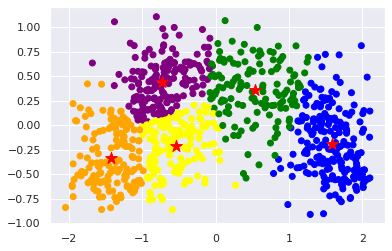

In [165]:
kmeans = KMeans(n_clusters=5, init='random', random_state=0)
kmeans.fit(pca_data)
kmeans_data = np.insert(pca_data,pca_data.shape[1], kmeans.labels_, axis = 1)

plt.scatter(kmeans_data[:,0],kmeans_data[:,1],c=kmeans_data[:,2], cmap=ListedColormap(colors))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=150, marker='*')

#### **K-MEANS++**

KMeans(n_clusters=5)


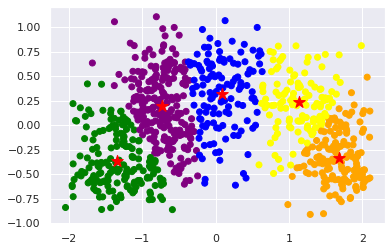

In [274]:
kmeansp = KMeans(n_clusters=5,init='k-means++')
kmeansp.fit(pca_data)
kmeansp_data = np.insert(pca_data,pca_data.shape[1], kmeansp.labels_, axis = 1)

plt.scatter(kmeansp_data[:,0],kmeansp_data[:,1],c=kmeansp_data[:,2], cmap=ListedColormap(colors))
plt.scatter(kmeansp.cluster_centers_[:,0],kmeansp.cluster_centers_[:,1],c='red',s=150, marker='*')

#### **K-MEDIOD**

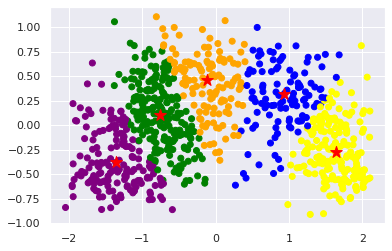

In [167]:
kmedoids = KMedoids(n_clusters=5, random_state=0)
kmedoids.fit(pca_data)
kmedoids_data = np.insert(pca_data,pca_data.shape[1], kmedoids.labels_, axis = 1)

plt.scatter(kmedoids_data[:,0],kmedoids_data[:,1],c=kmedoids_data[:,2], cmap=ListedColormap(colors))
plt.scatter(kmedoids.cluster_centers_[:,0],kmedoids.cluster_centers_[:,1],c='red',s=150, marker='*')

In [171]:
result = np.insert(pca_data,pca_data.shape[1], kmeans.labels_, axis = 1)
result = np.insert(result,result.shape[1], kmeansp.labels_, axis = 1)
result = np.insert(result,result.shape[1], kmedoids.labels_, axis = 1)
result

array([[-0.48786918, -0.45112464,  4.        ,  0.        ,  1.        ],
       [-0.62611488, -0.30882538,  4.        ,  0.        ,  1.        ],
       [-1.45175193, -0.03532646,  0.        ,  2.        ,  3.        ],
       ...,
       [ 1.42778918,  0.18678201,  2.        ,  1.        ,  4.        ],
       [ 1.19772504,  0.25494247,  2.        ,  1.        ,  2.        ],
       [ 1.52965586, -0.40187536,  2.        ,  3.        ,  4.        ]])

### **Zadanie 3**
Wykonaj klasteryzacje dla tego samego zbioru danych na podstawie algorytmów:
• AgglomerativeClustering z dowolnym typem klasteryzacji, typem wiązania oraz metryką
odległości
• DBSCAN z domyślnymi wartościami argumentów
####AgglomerativeClustering

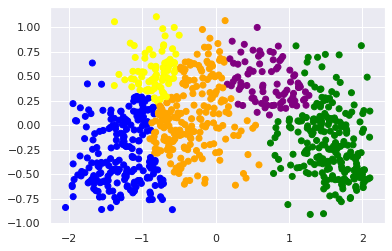

In [203]:
ac = AgglomerativeClustering(n_clusters=5)
ac.fit(pca_data)
ac_data = np.insert(pca_data,pca_data.shape[1], ac.labels_, axis = 1)
plt.scatter(ac_data[:,0],ac_data[:,1],c=ac_data[:,2], cmap=ListedColormap(colors))

####DBSCAN

array([[-0.48786918, -0.45112464, -1.        ],
       [-0.62611488, -0.30882538,  3.        ],
       [-1.45175193, -0.03532646, -1.        ],
       ...,
       [ 1.42778918,  0.18678201,  5.        ],
       [ 1.19772504,  0.25494247, -1.        ],
       [ 1.52965586, -0.40187536, -1.        ]])

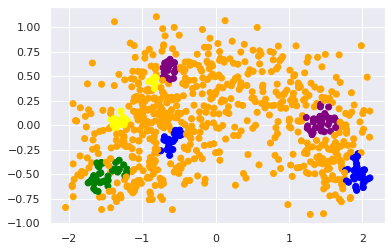

In [262]:
db = DBSCAN(eps=0.12, min_samples=15,p=4)
db.fit(pca_data)
db_data = np.insert(pca_data,pca_data.shape[1], db.labels_, axis = 1)
plt.scatter(db_data[:,0],db_data[:,1],c=db_data[:,2], cmap=ListedColormap(colors))
db_data

In [263]:
result = np.insert(pca_data,pca_data.shape[1], ac.labels_, axis = 1)
result = np.insert(result,result.shape[1], db.labels_, axis = 1)
result

array([[-0.48786918, -0.45112464,  0.        , -1.        ],
       [-0.62611488, -0.30882538,  0.        ,  3.        ],
       [-1.45175193, -0.03532646,  2.        , -1.        ],
       ...,
       [ 1.42778918,  0.18678201,  1.        ,  5.        ],
       [ 1.19772504,  0.25494247,  3.        , -1.        ],
       [ 1.52965586, -0.40187536,  1.        , -1.        ]])

### **Zadanie 4**
Korzystając z miary silhouette, a dokładnie średniej miary silhouette dla wszystkich klastrów
oblicz i zaprezentuj graficznie optymalne liczby klastrów dla każdego z analizowanych
algorytmów w zakresie od 2 do 15 klastrów.

###K-MEANS

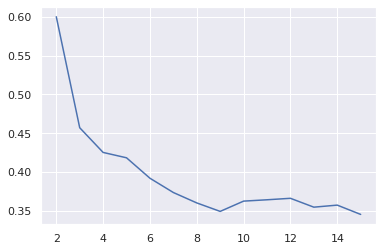

In [281]:
x = []
y = []
for i in range(2, 16):
  cluster = KMeans(n_clusters=i, init='random', random_state=0)
  cluster_labels = cluster.fit_predict(pca_data)
  silhouette_avg = silhouette_score(pca_data, cluster_labels)
  x.append(i)
  y.append(silhouette_avg)
plt.plot(x,y)

###K-MEAN++

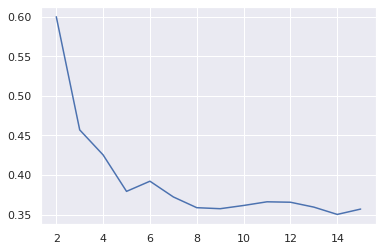

In [283]:
x = []
y = []
for i in range(2, 16):
  cluster = KMeans(n_clusters=i,init='k-means++')
  cluster_labels = cluster.fit_predict(pca_data)
  silhouette_avg = silhouette_score(pca_data, cluster_labels)
  x.append(i)
  y.append(silhouette_avg)
plt.plot(x,y)

###K-MEDOIDS

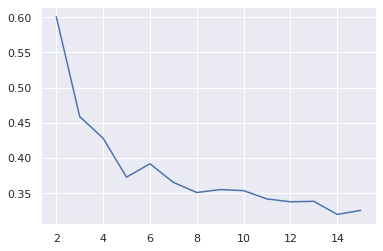

In [284]:
x = []
y = []
for i in range(2, 16):
  cluster = KMedoids(n_clusters=i, random_state=0)
  cluster_labels = cluster.fit_predict(pca_data)
  silhouette_avg = silhouette_score(pca_data, cluster_labels)
  x.append(i)
  y.append(silhouette_avg)
plt.plot(x,y)

###AgglomerativeClustering

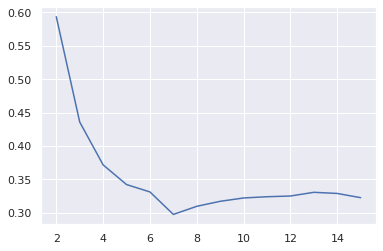

In [285]:
x = []
y = []
for i in range(2, 16):
  cluster = AgglomerativeClustering(n_clusters=i)
  cluster_labels = cluster.fit_predict(pca_data)
  silhouette_avg = silhouette_score(pca_data, cluster_labels)
  x.append(i)
  y.append(silhouette_avg)
plt.plot(x,y)